# Multi-Layer Perceptron (MLP)

### XOR gate
| $x_1$ | $x_2$ | XOR | AND | OR  |
| --- | --- | --- |--- | --- |
| 1   |  1  |  0  | 1  |  1  |
| 1   |  0  |  1  | 0  |  1  |
| 0   |  1  |  1  | 0  |  1  |
| 0   |  0  |  0  | 0  |  0  |

In [8]:
import numpy as np
X = np.array([[1,1],[1,0],[0,1],[0,0]])
xor = np.array([0,1,1,0])
OR = np.array([1,1,1,0])

In [9]:
from tensorflow import keras
from keras import models 
from keras import layers
import matplotlib.pyplot as plt

net_OR = models.Sequential()
net_OR.add(layers.Dense(1, activation='sigmoid'))
net_OR.compile(loss='binary_crossentropy', optimizer='nadam', metrics=['binary_accuracy'])

net_OR.fit(X, OR, epochs=1000, verbose=0)

In [10]:
net_OR.predict(X)

array([[0.970533  ],
       [0.85818815],
       [0.7847794 ],
       [0.40118858]], dtype=float32)

In [11]:
net_OR.get_weights()

[array([[2.2008374],
        [1.6942544]], dtype=float32), array([-0.40051514], dtype=float32)]

In [12]:
net_xor = models.Sequential()
net_xor.add(layers.Dense(1, activation='sigmoid'))
net_xor.compile(loss='binary_crossentropy', optimizer='nadam', metrics=['binary_accuracy'])

net_xor.fit(X, xor, epochs=100, verbose=0)
net_xor.predict(X)

array([[0.4930124 ],
       [0.40649727],
       [0.5934748 ],
       [0.5069587 ]], dtype=float32)

In [13]:
net_xor.get_weights()

[array([[-0.40630117],
        [ 0.35051233]], dtype=float32), array([0.02783657], dtype=float32)]

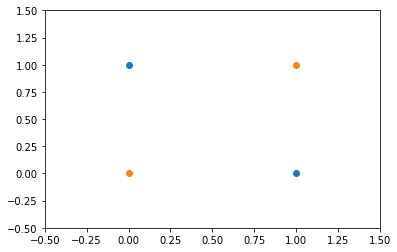

In [14]:
x=np.arange(-1,2,0.1)
plt.xlim(-0.5,1.5)
plt.ylim(-0.5,1.5)
plt.plot([1,0],[0,1],'o')
plt.plot([1,0],[1,0],'o')
plt.plot(x,)

### MLP (XOR gate)

In [37]:
net = models.Sequential()
net.add(layers.Dense(4, activation='relu'))
net.add(layers.Dense(1, activation='relu'))
net.compile(loss='binary_crossentropy', optimizer='nadam', metrics=['binary_accuracy'])

net.fit(X, xor, epochs=1000, verbose=0)

In [41]:
net.predict(X)

array([[0.       ],
       [1.0028781],
       [1.0086772],
       [0.       ]], dtype=float32)

## MNIST

In [43]:
from keras.datasets import mnist
from keras.utils import to_categorical

(X_train, y_train), (X_test, y_test) = mnist.load_data()
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [46]:
net = models.Sequential()
net.add(layers.Dense(512, activation='relu', input_shape=(28*28,))) 
net.add(layers.Dense(10, activation='softmax')) 
net.compile(optimizer='nadam',loss='categorical_crossentropy',metrics=['accuracy'])

# preprocessing
X_train = X_train.reshape((60000, 28*28))
X_train = X_train/255

X_test = X_test.reshape((10000, 28*28))
X_test = X_test/255

In [47]:
net.fit(X_train, y_train, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 1s 2ms/step - loss: 0.2630 - accuracy: 0.9244
Epoch 2/5
469/469 [==============================] - 1s 2ms/step - loss: 0.1076 - accuracy: 0.9686
Epoch 3/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0693 - accuracy: 0.9799
Epoch 4/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0495 - accuracy: 0.9854
Epoch 5/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0368 - accuracy: 0.9892


In [48]:
test_loss, test_acc = net.evaluate(X_test,y_test)

313/313 [==============================] - 0s 495us/step - loss: 0.0653 - accuracy: 0.9809
